In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../creme/')
import utils
# import pickle
import glob
import pandas as pd
import numpy as np
# import itertools, os
from scipy.stats import pearsonr
# from tqdm import tqdm
import operator

import matplotlib.pyplot as plt
import seaborn as sns


2024-03-08 11:20:18.355841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pdf_base_dir = utils.make_dir('pdfs')
pdf_dir = utils.make_dir(f'{pdf_base_dir}/borzoi/')
summary_csvs = '../results/summary_csvs/borzoi/'

In [3]:
csv_dir = f'../results/summary_csvs/borzoi/'
cell_lines = ['K562 ENCODE, biol_', 'GM12878 ENCODE, biol_', 'PC-3']



# TSS activity: Borzoi vs Enformer 

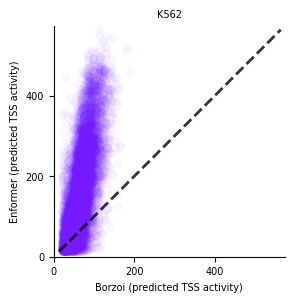

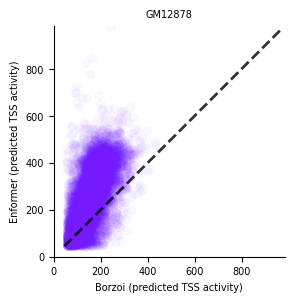

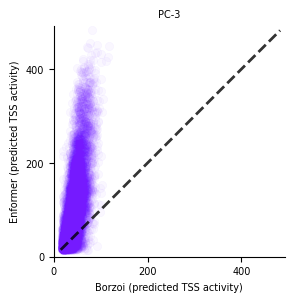

In [10]:
fontsize = 7
column_transl = {'K562 ENCODE, biol_': 'K562', 'GM12878 ENCODE, biol_': 'GM12878'}
for c, cell_line in enumerate(['K562', 'GM12878', 'PC-3']):
    fig, ax = plt.subplots(1, 1, figsize=[4, 3])
    borzoi_selected_genes = pd.read_csv(glob.glob(f'../results/summary_csvs/borzoi/*_{cell_line}*selected_genes.csv')[0])
    borzoi_selected_genes = borzoi_selected_genes.rename(columns=column_transl)
    enformer_selected_genes = pd.read_csv(glob.glob(f'../results/summary_csvs/enformer/*{cell_line}_selected_genes.csv')[0])
    borzoi_enf_merge = borzoi_selected_genes.merge(enformer_selected_genes, on=['gene_name'], suffixes=['_borzoi', '_enformer'])



    
    x=borzoi_enf_merge[f'{cell_line}_borzoi']
    y=borzoi_enf_merge[f'{cell_line}_enformer']
    sns.scatterplot(x=x, y=y, ax=ax, 
                color = '#751aff',
                edgecolor = None,
                alpha = 0.03)  
    min_point = np.array([y]).min()
    max_point = np.array([x, y]).max()

    # add y=x line
    plt.plot([min_point,max_point],[min_point,max_point], lw=2, color='k', alpha=0.8, linestyle='dashed')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Enformer (predicted TSS activity)', fontsize=fontsize)
    ax.set_xlabel('Borzoi (predicted TSS activity)', fontsize=fontsize)
    ax.set_title(cell_line, fontsize=fontsize)
    ax.set_aspect('equal')
    max_axis =  np.max(np.array([x, y]))+10

    plt.xticks(list(range(0, int(max_axis), 200)))
    plt.yticks(list(range(0, int(max_axis), 200)))

    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    _, xmax = ax.get_xlim()
    ax.set_ylim(0, max_axis)

    ax.set_xlim(0, max_axis)
    
    # ax.set_title(f'{cell_line} PCC={np.round(pearsonr(x,y)[0], 3)}, N={borzoi_enf_merge.shape[0]}')
    # plt.suptitle('Gene level comparison')
    plt.savefig(f"{pdf_dir}/gene_activity_comparison_{cell_line}.png", bbox_inches='tight')
    


# Context dependence test

In [12]:
res = pd.read_csv(f'{summary_csvs}/context_dependence_test.csv')
selected_contexts = res[[True if c in ['enhancing', 'neutral', 'silencing'] else False for c in res['context']]]
for cell_line, df in selected_contexts.groupby('cell_line'):
    df.to_csv(f'../results/summary_csvs/borzoi/{cell_line}_selected_contexts.csv')
selected_contexts.groupby(['cell_line', 'context']).count()

Unnamed: 0  delta_mean  path   wt
cell_line context                                     
GM12878   enhancing         113         113   113  113
          neutral            54          54    54   54
          silencing          12          12    12   12
K562      enhancing         204         204   204  204
          neutral            61          61    61   61
          silencing          17          17    17   17
PC-3      enhancing          71          71    71   71
          neutral            63          63    63   63
          silencing          13          13    13   13

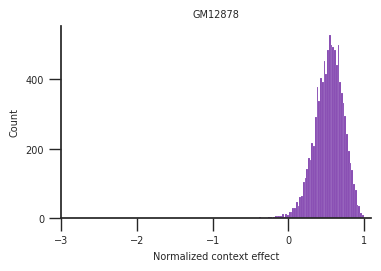

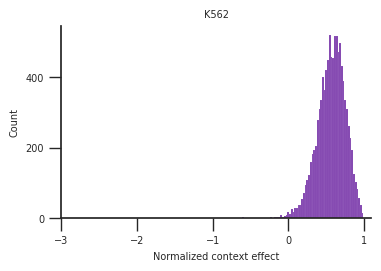

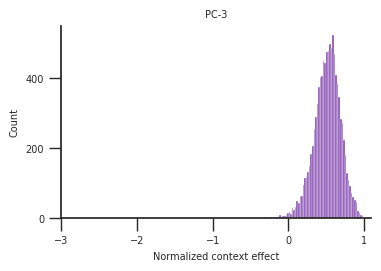

In [13]:
fontsize = 7
sns.set(font_scale = 1.1)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
for k, df in res.groupby('cell_line'):
    # df = df[(df['delta_mean'] > -10) & (df['wt'] > 3)]
    fig = plt.figure(figsize=[4, 2.5])
    ax = sns.histplot(x=df['delta_mean'], color='#5A0896')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel('Count', fontsize=fontsize)
    plt.xlabel('Normalized context effect', fontsize=fontsize) 
    plt.xlim([-2,1.1])
    ax.set_title(k, fontsize=fontsize)

    plt.xticks([-3, -2, -1, 0, 1])
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    
    # plt.title(f'Context Dependence Test {k} N={df.shape[0]}')
    fig.savefig(f"{pdf_dir}/context_dependence_test_{k}.pdf",  bbox_inches='tight')

    # fig.savefig(f'{pdf_dir}/{model_name}_{k}_TSS_context_effect_hist.pdf', format='pdf', dpi=300, bbox_inches='tight')


# Select enhancing, silencing and neutral contexts

(113, 6)
(54, 6)
(12, 6)
['enhancing (N=113)', 'neutral (N=54)', 'silencing (N=12)']
(204, 6)
(61, 6)
(17, 6)
['enhancing (N=200)', 'neutral (N=61)', 'silencing (N=17)']
(71, 6)
(63, 6)
(13, 6)
['enhancing (N=71)', 'neutral (N=63)', 'silencing (N=13)']


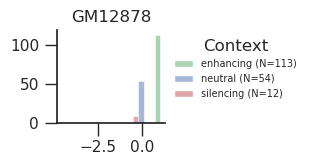

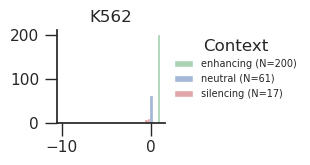

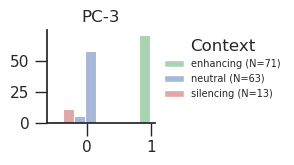

In [63]:
max_sample_size = 200
for k, df in res.groupby('cell_line'):
    
    
    fig = plt.figure(figsize=[1.4, 1.2])
    sns.set(font_scale = 1.)
    sns.set_style(style='white')
    plt.rcParams['xtick.major.size'] = 9
    plt.rcParams['xtick.major.width'] = 1
    
    plt.rcParams['ytick.major.size'] = 9
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['ytick.left'] = True
    context_df = df[(df['context']!='other') & (df['context']!='other1')]
    context_df_subsample = []
    for context_type, one_context_df in context_df.groupby('context'):
        print(one_context_df.shape)
        if one_context_df.shape[0] > max_sample_size:
            
            context_df_subsample.append(one_context_df.sample(max_sample_size, random_state=42))
        else:
            context_df_subsample.append(one_context_df)
    context_df = pd.concat(context_df_subsample)

    context_df = context_df.sort_values('context')
    ax = sns.histplot(data=context_df, 
                      x='delta_mean', hue='context', 
                      hue_order=['enhancing', 'neutral', 'silencing'],
                      palette=['g', 'b', 'r'])
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.legend(frameon=False);
    legend = ax.get_legend()
    handles = legend.legend_handles
    legend.remove()
    labels = [f"{c} (N={s})" for _, (c, s) in context_df.groupby('context').count().reset_index().iloc[:,:2].iterrows() 
              if 'other' not in c]
    print(labels)
    ax.legend(handles, labels, fontsize=fontsize,
              title='Context', frameon=False, bbox_to_anchor=[1,1])
    
    plt.ylabel('')
    plt.xlabel('')
    
    plt.title(k)
    fig.savefig(f"{pdf_dir}/context_stratification_{k}.pdf")

    # plt.ylim(0,100)
    # plt.xlim([-2,1.1])
    # plt.yticks([0,50,100])
    # fig.savefig(f'{pdf_dir}/{model_name}_{k}_TSS_context_effect_inset.pdf', format='pdf', dpi=300, bbox_inches='tight')
    # context_df.to_csv(f'../results/summary_csvs//{model_name}/{k.split()[0]}_selected_contexts.csv')


# Sufficiency test

In [18]:
tile_df = pd.read_csv('../results/summary_csvs/borzoi/sufficiency_test_tile_coordinates.csv').T.iloc[1:-1,:]
cell_lines_dict = {'K562': 'K562 ENCODE, biol_', 'GM12878': 'GM12878 ENCODE, biol_', 'PC-3': 'PC-3'}
result_summary = pd.read_csv(f'{summary_csvs}/sufficiency_test.csv')

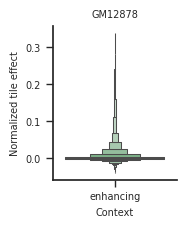

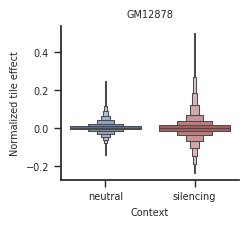

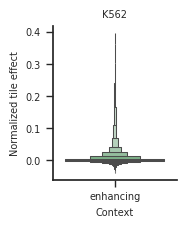

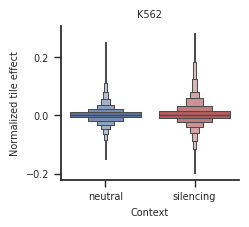

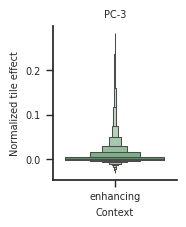

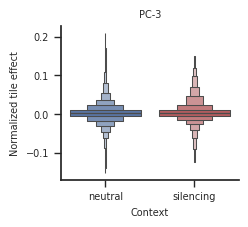

In [24]:
my_pal = {"enhancing": "g", "neutral": "b", "silencing":"r"}
sns.set(font_scale = .9)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# fig, axes = plt.subplots(3, 2, figsize=[10, 8])
sizes = [1.6, 2.3]
filenames = ['enhancing', 'non-enhancing']

for c, (cell, df) in enumerate(result_summary.groupby('cell_line')):
    enh_cont = df[df['context'] == 'enhancing']
    others = df[df['context'] != 'enhancing']


    for p, (df_cont, y) in enumerate([[enh_cont, '(MUT - CONTROL) / WT'],
                                     [others.sort_values('context'), '(MUT - CONTROL) / CONTROL']]):
        fig, ax = plt.subplots(1, 1, figsize=[sizes[p], 2])

        sns.boxenplot(x='context', y=y, data=df_cont, 
                      showfliers=False,
                      hue='context',
                      ax=ax,
                      palette = my_pal)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        ax.set_xlabel('Context', fontsize=10)
        ax.set_xlabel('Context', fontsize=fontsize)
        ax.set_ylabel('Normalized tile effect', fontsize=fontsize)
                
        # ax.legend(bbox_to_anchor=[1.3,1])
        ax.set_title(cell, fontsize=fontsize)

        fig.savefig(f'{pdf_dir}/sufficiency_test_{cell}_{filenames[p]}.pdf',  bbox_inches='tight')


# Select sufficient CREs

In [9]:
result_summary = pd.read_csv(f'{summary_csvs}/sufficiency_test.csv')

In [10]:
selected_cres = []
for cell, df in result_summary.groupby('cell_line'):
    enh_cont_df = (df[df['context'] == 'enhancing']).copy()  # only select enhancing CREs in enhancing contexts
    sil_cont_df = (df[(df['context'] == 'neutral') | (df['context'] == 'silencing')]).copy()  # only select silencing CREs in silencing contexts
    enh_cont_df['Normalized CRE effect'] = enh_cont_df[
        '(MUT - CONTROL) / WT']  # different norm for tiles from enh vs sil
    sil_cont_df['Normalized CRE effect'] = sil_cont_df['(MUT - CONTROL) / CONTROL']

    enh_cres = (enh_cont_df[(enh_cont_df['Normalized CRE effect'] > 0.3)]).copy()
    enh_cres['tile class'] = 'Enhancer'
    selected_cres.append(enh_cres)
    sil_cres = (sil_cont_df[(sil_cont_df['Normalized CRE effect'] < -0.15)]).copy()
    sil_cres['tile class'] = 'Silencer'
    selected_cres.append(sil_cres)
selected_cres = pd.concat(selected_cres)
selected_cres[selected_cres['cell_line']=='K562'].to_csv('../results/summary_csvs/borzoi/sufficient_CREs.csv')
# selected_cres.to_csv(f'{csv_dir}/sufficient_CREs.csv')

In [11]:
selected_cres.groupby(['cell_line', 'tile class']).count()

Unnamed: 0  (MUT - CONTROL) / WT  \
cell_line tile class                                     
GM12878   Enhancer             8                     8   
          Silencer            21                    21   
K562      Enhancer            21                    21   
          Silencer            16                    16   
PC-3      Enhancer             6                     6   
          Silencer             9                     9   

                      (MUT - CONTROL) / CONTROL  seq_id  control  wt  mut  \
cell_line tile class                                                        
GM12878   Enhancer                            8       8        8   8    8   
          Silencer                           21      21       21  21   21   
K562      Enhancer                           21      21       21  21   21   
          Silencer                           16      16       16  16   16   
PC-3      Enhancer                            6       6        6   6    6   
          Silencer                            9       9        9   9    9   

                      tile_start  tile_end  context  Normalized CRE effect  
cell_line tile class                                                        
GM12878   Enhancer             8         8        8                      8  
          Silencer            21        21       21                     21  
K562      Enhancer            21        21       21                     21  
          Silencer            16        16       16                     16  
PC-3      Enhancer             6         6        6                      6  
          Silencer             9         9        9                      9

# Sufficient tile distribution

In [112]:
tss_tile = pd.read_csv(f'{summary_csvs}/sufficiency_test_tile_coordinates.csv').T.iloc[-1,:]

In [13]:
selected_cres['tile start relative to tss'] =  np.abs(selected_cres['tile_start'] - tss_tile[0]) // 1000


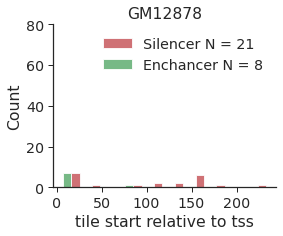

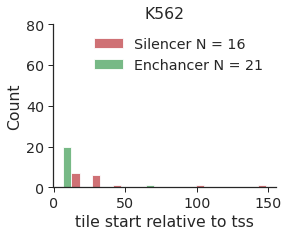

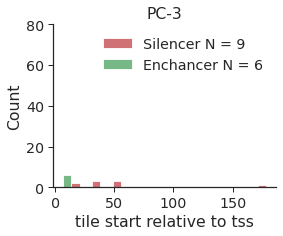

In [14]:
sns.set(font_scale = 1.3)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
color_map = {'Silencer': 'r', 'Enhancer': 'g'}
for cell, df in selected_cres.groupby('cell_line'):
    fig, ax = plt.subplots(1, 1, figsize=[4,3])
    N = ({r[0]: r[1] for _,r in df.groupby('tile class').count().iloc[:,1].reset_index().iterrows()})
    sns.histplot(data=df, x='tile start relative to tss', hue='tile class', multiple="dodge", shrink=.8, ax=ax,bins=10, palette=color_map, alpha=0.8)
    ax.set_yticks([0, 20, 40, 60, 80])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend([f'Silencer N = {N["Silencer"]}', f'Enchancer N = {N["Enhancer"]}'], frameon=False)
    plt.title(cell)
    # fig.savefig(f'{pdf_dir}/{cell}_CRE_frequency_vs_distance.pdf')
    plt.show()

# Distance test

In [135]:
# result_normalized_effects = pd.read_csv(f"{summary_csvs}/distance_test.csv")
# borzoi_model_seq_length = 524288

# tss_tile, cre_tiles = utils.set_tile_range(borzoi_model_seq_length, 5000)

# cre_tiles_starts = np.array(cre_tiles).T[0]
# cre_tiles_starts_abs = np.abs(cre_tiles_starts - tss_tile[0]) // 1000


# fontsize=10
# n_df = result_normalized_effects.groupby(['tile class']).count()
# n_dict = dict(zip(list(n_df.index), n_df.iloc[:,-1]))
# my_palette = {}
# tile_labels = {}
# for i, row in n_df.iterrows():
#     c = 'g' if i=='Enhancer' else 'r'
#     my_palette[f'{i} N={row.iloc[0]//len(cre_tiles_starts_abs)}'] = c
#     k = 'Enhancer' if 'Enh' in i else 'Silencer'
#     tile_labels[k] = f'{i} N={row.iloc[0]//len(cre_tiles_starts_abs)}'
# result_normalized_effects['tile class'] = [tile_labels[t] for t in result_normalized_effects['tile class']]


# for y, hline_y, filename_label in [['Fold change over control', 1, 'fold_change'], ["CRE sufficiency effect", 0, 'cre_effect']]:
#     if filename_label == 'fold_change':
#         fig, ax = plt.subplots(1, figsize=[5, 3])
        
#     else:
#         fig, ax = plt.subplots(1, figsize=[4, 2])
    
#     ax=sns.lineplot(data=result_normalized_effects, x='Binned distance (Kb)', 
#                     y=y, hue='tile class', ci='sd',
#                   palette=my_palette)
#     ax.plot([1, 250],[hline_y, hline_y], '--k')
#     ax.set_xlim([5, 250])
#     # ax.set_ylim(0,1.75)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     plt.setp(ax.get_xticklabels(), fontsize=fontsize)
#     plt.setp(ax.get_yticklabels(), fontsize=fontsize)
#     plt.yticks(fontsize=fontsize)
#     # plt.xticks([0,25,50,75], fontsize=fontsize)
#     ax.set_xlabel('Distance to TSS (Kb)', fontsize=fontsize)
#     if y == "CRE sufficiency effect":
#         ax.set_ylabel('Tile effect size', fontsize=fontsize)
#         ax.set_ylim(-1,1)
#         ax.set_yticks([-1, 0, 1])
#         ax.set_title('Borzoi | K562', fontsize=fontsize)

#     else:
#         ax.set_ylabel(y, fontsize=fontsize)
#         ax.set_ylim(0,1.1)
#         ax.set_yticks([0, 0.5, 1])



    
#     plt.legend(frameon=False, bbox_to_anchor=[1.5,1], fontsize=fontsize)
#     plt.savefig(f"{pdf_dir}/distance_test_{filename_label}.pdf", bbox_inches='tight')
#     plt.show()

In [37]:
result_normalized_effects = pd.read_csv(f"{summary_csvs}/distance_test.csv")

sorted_dfs = []
x_axis = np.concatenate([-(result_normalized_effects['Binned distance (Kb)'].unique()),
                        result_normalized_effects['Binned distance (Kb)'].unique()[::-1]])
for s, df in result_normalized_effects.groupby('seq_id'):
    pointers = np.arange(df.shape[0])
    tile_class = df['tile class'].values[0]
    cre_effect = df['CRE sufficiency effect'].values
    relative_effect = df['Fold change over control'].values
    half_window = pointers.shape[0] // 2
    left_side = pointers[:half_window]
    right_side = pointers[half_window:]
    if 'Enhancer' in tile_class:
        compare = operator.gt
    else:
        compare = operator.lt # strong = what leads to biggest drop in silencers

    if compare(np.mean(cre_effect[left_side]), np.mean(cre_effect[right_side])):
        strong_eff = cre_effect[left_side][::-1] # flip the left side
        weak_eff = cre_effect[right_side]

        strong_rel_eff = relative_effect[left_side][::-1]
        weak_rel_eff = relative_effect[right_side]
        

    else:
        strong_eff = cre_effect[right_side]
        weak_eff = cre_effect[left_side]
        strong_rel_eff = relative_effect[right_side]
        weak_rel_eff = relative_effect[left_side]


    sorted_df = pd.DataFrame([np.concatenate([weak_eff, strong_eff]), np.concatenate([weak_rel_eff, strong_rel_eff])]).T
    
    sorted_df.columns = ['CRE sufficiency effect', 'Fold change over control']
    sorted_df['seq_id'] = s
    sorted_df['tile class'] = tile_class
    sorted_df['Binned distance (Kb)'] = x_axis
    sorted_dfs.append(sorted_df)

sorted_dfs = pd.concat(sorted_dfs)

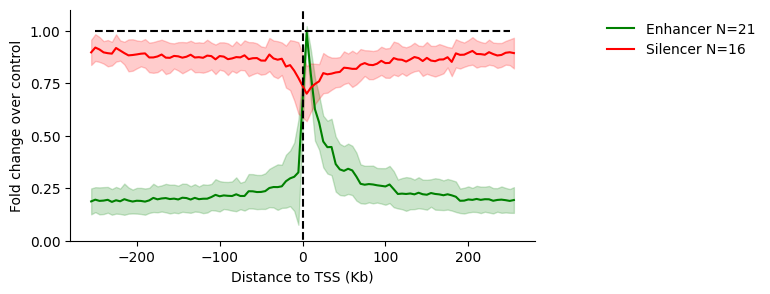

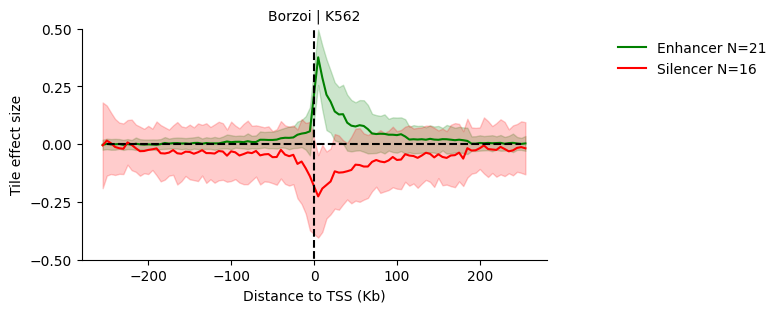

In [38]:
borzoi_model_seq_length = 524288

tss_tile, cre_tiles = utils.set_tile_range(borzoi_model_seq_length, 5000)

cre_tiles_starts = np.array(cre_tiles).T[0]
cre_tiles_starts_abs = np.abs(cre_tiles_starts - tss_tile[0]) // 1000


fontsize=10
n_df = sorted_dfs.groupby(['tile class']).count()
n_dict = dict(zip(list(n_df.index), n_df.iloc[:,-1]))
my_palette = {}
tile_labels = {}
for i, row in n_df.iterrows():
    c = 'g' if i=='Enhancer' else 'r'
    my_palette[f'{i} N={row.iloc[0]//len(cre_tiles_starts_abs)}'] = c
    k = 'Enhancer' if 'Enh' in i else 'Silencer'
    tile_labels[k] = f'{i} N={row.iloc[0]//len(cre_tiles_starts_abs)}'
sorted_dfs['tile class'] = [tile_labels[t] for t in sorted_dfs['tile class']]


for y, hline_y, filename_label in [['Fold change over control', 1, 'fold_change'], ["CRE sufficiency effect", 0, 'cre_effect']]:
    fig, ax = plt.subplots(1, figsize=[6, 3])
        
 
    ax=sns.lineplot(data=sorted_dfs, x='Binned distance (Kb)', 
                    y=y, hue='tile class', errorbar='sd',
                  palette=my_palette)
    ax.plot([-250, 250],[hline_y, hline_y], '--k')
    ax.plot([0, 0],[-1, 2], '--k')

    # ax.set_xlim([5, 250])
    # ax.set_ylim(0,1.75)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xticks([0,25,50,75], fontsize=fontsize)
    ax.set_xlabel('Distance to TSS (Kb)', fontsize=fontsize)
    if y == "CRE sufficiency effect":
        ax.set_ylabel('Tile effect size', fontsize=fontsize)
        ax.set_ylim(-0.5, 0.5)
        ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])

        ax.set_title('Borzoi | K562', fontsize=fontsize)

    else:
        ax.set_ylabel(y, fontsize=fontsize)
        ax.set_ylim(0,1.1)
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1])



    
    plt.legend(frameon=False, bbox_to_anchor=[1.5,1], fontsize=fontsize)
    plt.savefig(f"{pdf_dir}/distance_test_{filename_label}.pdf", bbox_inches='tight')
    plt.show()

In [5]:
my_palette

{'Enhancer N=21': 'g', 'Silencer N=16': 'r'}